### Assignment 3.3 : Using data to Improve a Marketing Promotion
### Gourav Verma
### Date: 9/15/2020

In [1]:
# Import important libraries
library(ggplot2)
library(tree)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tree' was built under R version 3.6.3"

In [2]:
# Read the file
Dodg <- read.csv("dodgers.csv")
str(Dodg)

'data.frame':	81 obs. of  12 variables:
 $ month      : Factor w/ 7 levels "APR","AUG","JUL",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day        : int  10 11 12 13 14 15 23 24 25 27 ...
 $ attend     : int  56000 29729 28328 31601 46549 38359 26376 44014 26345 44807 ...
 $ day_of_week: Factor w/ 7 levels "Friday","Monday",..: 6 7 5 1 3 4 2 6 7 1 ...
 $ opponent   : Factor w/ 17 levels "Angels","Astros",..: 13 13 13 11 11 11 3 3 3 10 ...
 $ temp       : int  67 58 57 54 57 65 60 63 64 66 ...
 $ skies      : Factor w/ 2 levels "Clear ","Cloudy": 1 2 2 2 2 1 2 2 2 1 ...
 $ day_night  : Factor w/ 2 levels "Day","Night": 1 2 2 2 2 1 2 2 2 2 ...
 $ cap        : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ shirt      : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ fireworks  : Factor w/ 2 levels "NO","YES": 1 1 1 2 1 1 1 1 1 2 ...
 $ bobblehead : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
# Reorder the factor levels for day_of_week
Dodg$day_of_week <- factor(Dodg$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", 
                                                        "Thursday", "Friday", "Saturday", "Sunday"))

# Reorder the factor levels for month
Dodg$month <- factor(Dodg$month, levels = c("APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT"))


#### Attendance by Day of the Week

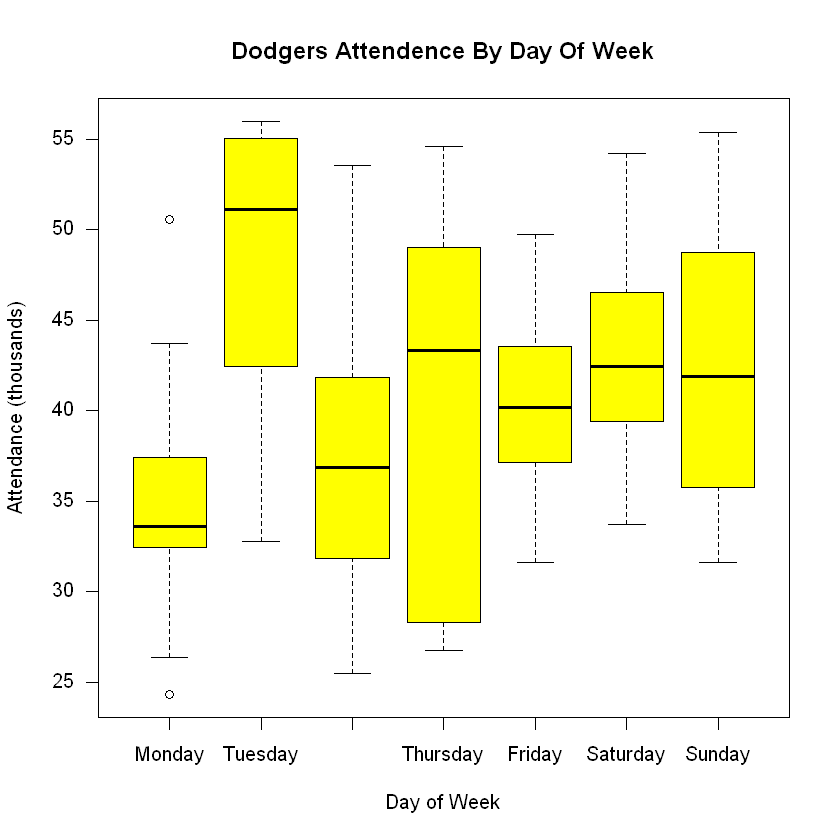

In [4]:
## Box plot to explore attendance by day of week
plot(Dodg$day_of_week, Dodg$attend / 1000, 
     main = "Dodgers Attendence By Day Of Week", 
     xlab = "Day of Week", 
     ylab = "Attendance (thousands)", 
     col = "yellow", las = 1)

##### Interventions
+ **Tuesday** is the high attendance day, as the median line seems to be the highest. 
+ **Monday** seems lowest attendance day.

#### Attendance by Month

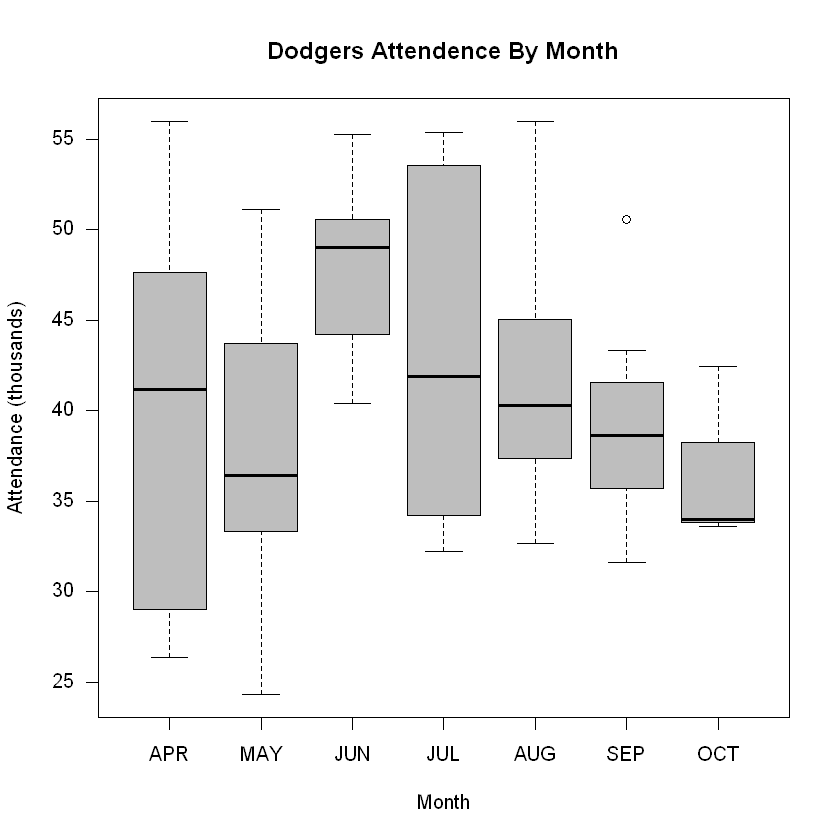

In [5]:
plot(Dodg$month, Dodg$attend / 1000, 
     main = "Dodgers Attendence By Month", 
     xlab = "Month", 
     ylab = "Attendance (thousands)", 
     col = "gray", las = 1)

##### Interventions
+ **June** seems to be the high attendance Month as median seems to be highest.
+ Attendance seems to be the lowest in **October**.

#### Attendance by Weather

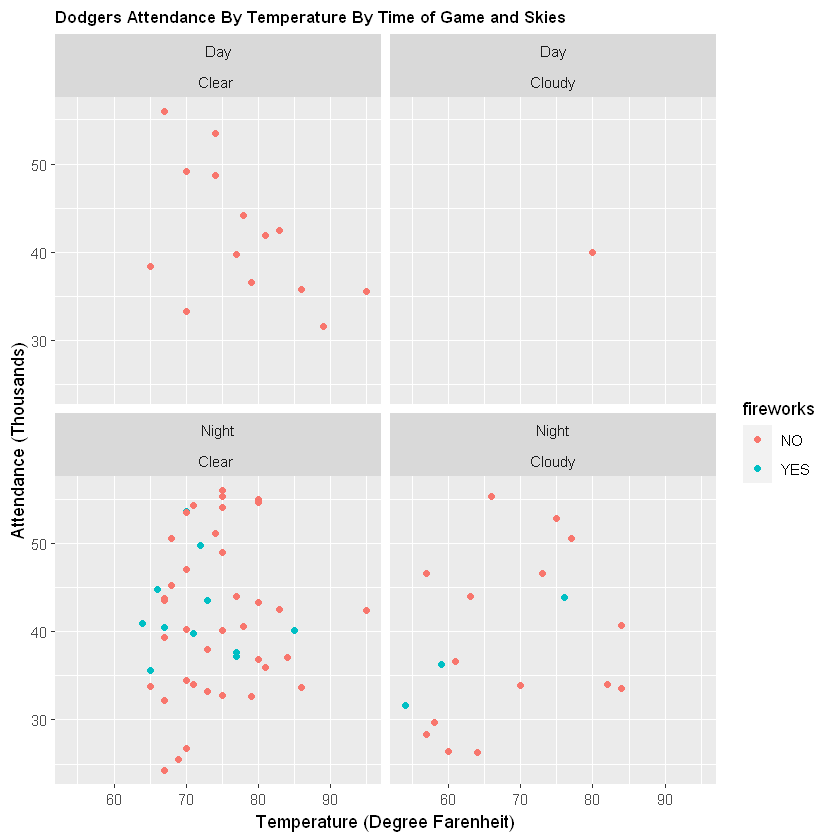

In [6]:
ggplot(Dodg, aes(x=temp, y=attend/1000, color=fireworks)) + 
        geom_point() + 
        facet_wrap(day_night~skies) + 
        ggtitle("Dodgers Attendance By Temperature By Time of Game and Skies") +
        theme(plot.title = element_text(lineheight=3, face="bold", color="black", size=10)) +
        xlab("Temperature (Degree Farenheit)") +
        ylab("Attendance (Thousands)")

##### Interventions
+ Highest attendance were obeserved when the temperature was less than 70 degree.
+ Majority of the games happened at night when sky was clear.
+ Attendance seems to be low with increase in temperature.

#### Attendance by Opponent

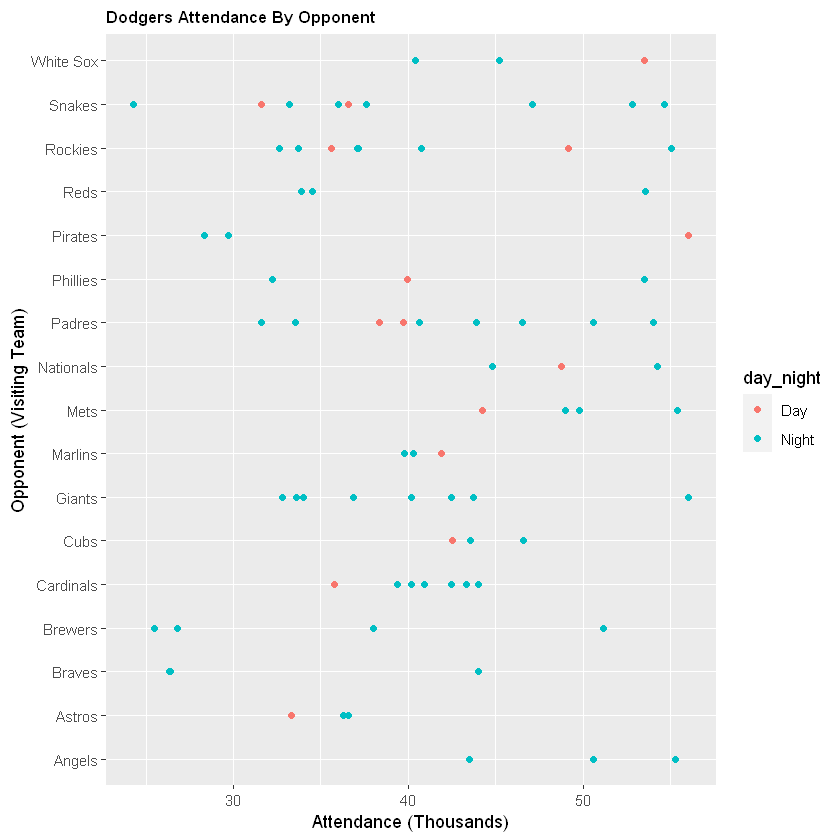

In [7]:
ggplot(Dodg, aes(x=attend/1000, y=opponent, color=day_night)) + 
        geom_point() + 
        ggtitle("Dodgers Attendance By Opponent") +
        theme(plot.title = element_text(lineheight=3, face="bold", color="black", size=10)) +
        xlab("Attendance (Thousands)") +
        ylab("Opponent (Visiting Team)")

##### Interventions
+ Games with opponents from large metropolitan areas show higher attendance consistently.

### Linear Model

In [8]:
## Training Set employ training-and-test regimen for model validation
set.seed(1234)                                   # set seed for repeatability of training-and-test split
training_test <- c(rep(1,length=trunc((2/3)*nrow(Dodg))),
                   rep(2,length=(nrow(Dodg) - trunc((2/3)*nrow(Dodg)))))
Dodg$training_test <- sample(training_test)      # random permutation 
Dodg$training_test <- factor(Dodg$training_test, 
                                levels=c(1,2), labels=c("TRAIN","TEST"))
Dodg.train <- subset(Dodg, training_test == "TRAIN")
Dodg.test <- subset(Dodg, training_test == "TEST")

In [9]:
# Create Model

# specify a simple model with bobblehead entered last
model <- {attend ~ month + day_of_week + bobblehead}

# fit the model to the training set
train.model.fit <- lm(model, data = Dodg.train)

# summary of model fit to the training set
print(summary(train.model.fit))


Call:
lm(formula = model, data = Dodg.train)

Residuals:
   Min     1Q Median     3Q    Max 
-10079  -3273  -1199   3145  12206 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           32241.2     2937.6  10.975 1.23e-13 ***
monthMAY              -1747.1     2985.7  -0.585 0.561720    
monthJUN               7235.9     3239.4   2.234 0.031157 *  
monthJUL               3346.7     3262.2   1.026 0.311100    
monthAUG               3370.8     2918.2   1.155 0.254906    
monthSEP               1019.2     3042.1   0.335 0.739353    
monthOCT               -600.8     4802.5  -0.125 0.901062    
day_of_weekTuesday    12816.2     3228.2   3.970 0.000291 ***
day_of_weekWednesday   5093.6     3686.9   1.382 0.174783    
day_of_weekThursday    5077.5     4129.1   1.230 0.226002    
day_of_weekFriday      5496.7     2680.1   2.051 0.046863 *  
day_of_weekSaturday    7712.3     2855.1   2.701 0.010083 *  
day_of_weekSunday      8688.5     3124.0   2.781 

In [10]:
# Prediction using train and test

# training set predictions from the model fit to the training set
Dodg.train$predict_attend <- predict(train.model.fit) 

# test set predictions from the model fit to the training set
Dodg.test$predict_attend <- predict(train.model.fit, 
                                       newdata = Dodg.test)

# compute the proportion of response variance accounted for when predicting out-of-sample
accuracy <- round(cor(Dodg.test$attend, Dodg.test$predict_attend)^2, digits=3)
print(accuracy)

[1] 0.383


#### Summarize the data from model

In [11]:
# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
model.fit <- lm(model, data = Dodg)  # use all available data
print(summary(model.fit))


Call:
lm(formula = model, data = Dodg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10786.5  -3628.1   -516.1   2230.2  14351.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          33909.16    2521.81  13.446  < 2e-16 ***
monthMAY             -2385.62    2291.22  -1.041  0.30152    
monthJUN              7163.23    2732.72   2.621  0.01083 *  
monthJUL              2849.83    2578.60   1.105  0.27303    
monthAUG              2377.92    2402.91   0.990  0.32593    
monthSEP                29.03    2521.25   0.012  0.99085    
monthOCT              -662.67    4046.45  -0.164  0.87041    
day_of_weekTuesday    7911.49    2702.21   2.928  0.00466 ** 
day_of_weekWednesday  2460.02    2514.03   0.979  0.33134    
day_of_weekThursday    775.36    3486.15   0.222  0.82467    
day_of_weekFriday     4883.82    2504.65   1.950  0.05537 .  
day_of_weekSaturday   6372.06    2552.08   2.497  0.01500 *  
day_of_weekSunday     6724.00    25

In [12]:
# tests statistical significance of the bobblehead promotion
# type I anova computes sums of squares for sequential tests
print(anova(model.fit))  

Analysis of Variance Table

Response: attend
            Df     Sum Sq   Mean Sq F value    Pr(>F)    
month        6  948958117 158159686  4.2225  0.001158 ** 
day_of_week  6 1314813030 219135505  5.8504 6.002e-05 ***
bobblehead   1  734587177 734587177 19.6118 3.590e-05 ***
Residuals   67 2509574563  37456337                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


##### My interpretation from the summary:

+ **t-value:** The coefficient t-value is a measure of how many standard deviations our coefficient estimate is far away from 0. In this case, overall t-values are not that far away from 0, meaning, a relationship exists between te variables.

+ **p-value:** The p-value is significantly low, meaning there is very less probability that the result of the statistical test is by chance. In other words, true relationship exists between the variables.

+ **R-Squared:** The R-squared value is 0.456, which means 45.6% of the vartiance found in the response variable can be explained by the predictor variable.

In [13]:
# Estimated effect on bobblehead on attendance

cat("\n","Estimated Effect of Bobblehead Promotion on Attendance: ",
    round(model.fit$coefficients[length(model.fit$coefficients)],
          digits = 0),"\n",sep="")


Estimated Effect of Bobblehead Promotion on Attendance: 10715


#### Conclusion
Looking at all the metrices, we can predict and quantify the effect of bobblehead promotion on the attendance of a match. As far as marketing is concerned, attaching financial criteria with the findings can provide the Dodgers revenue and effect of promotion on that.

#### Reference
www.rpubs.com